In [1]:
!pip install cython
!pip install opencv-python pillow pycocotools matplotlib

In [2]:
%cd /content

!git clone https://github.com/dbolya/yolact.git

/content
Cloning into 'yolact'...
remote: Enumerating objects: 2936, done.
remote: Total 2936 (delta 0), reused 0 (delta 0), pack-reused 2936
Receiving objects: 100% (2936/2936), 21.20 MiB | 20.94 MiB/s, done.
Resolving deltas: 100% (2002/2002), done.


In [3]:
%cd /content/yolact/external/DCNv2/
!python setup.py build develop

/content/yolact/external/DCNv2
running build
running build_ext
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:381: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
building '_ext' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/content
creating build/temp.linux-x86_64-3.7/content/yolact
creating build/temp.linux-x86_64-3.7/content/yolact/external
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2/src
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2/src/cpu
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2/src/cuda
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-Y7dW

In [4]:
%cd /content

!git clone https://github.com/chentinghao/download_google_drive.git

!mkdir -p /content/yolact/weights

!python ./download_google_drive/download_gdrive.py 1ZPu1YR2UzGHQD0o1rEqy-j5bmEm3lbyP ./yolact/weights/yolact_plus_resnet50_54_800000.pth

/content
Cloning into 'download_google_drive'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), done.
129MB [00:00, 152MB/s]


In [5]:
!mkdir /content/test_images

%cd /content/test_images

get_imgs = ['http://farm8.staticflickr.com/7200/6946559805_7edf757660_z.jpg',
            'http://farm3.staticflickr.com/2835/9520716824_51220b13d0_z.jpg',
            'http://farm3.staticflickr.com/2817/10105052924_0c8d79e62c_z.jpg',
            'https://farm3.staticflickr.com/2637/3679968895_37a79e55b3_z.jpg',
            'https://farm8.staticflickr.com/7137/7705349298_6bea29cf1c_z.jpg',
            'http://farm5.staticflickr.com/4105/4981945644_3f162314ed_z.jpg',
            'http://farm1.staticflickr.com/40/101757885_a8fc40e273_z.jpg',
            'http://farm3.staticflickr.com/2654/3897535041_fa8dd5570b_z.jpg']

for img_url in get_imgs:
    !wget {img_url} -nc


!pwd
!ls

/content/test_images
--2021-12-24 02:05:41--  http://farm8.staticflickr.com/7200/6946559805_7edf757660_z.jpg
Resolving farm8.staticflickr.com (farm8.staticflickr.com)... 52.85.72.96, 2600:9000:2029:5800:0:5a51:64c9:c681, 2600:9000:2029:6400:0:5a51:64c9:c681, ...
Connecting to farm8.staticflickr.com (farm8.staticflickr.com)|52.85.72.96|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://farm8.staticflickr.com/7200/6946559805_7edf757660_z.jpg [following]
--2021-12-24 02:05:41--  https://farm8.staticflickr.com/7200/6946559805_7edf757660_z.jpg
Connecting to farm8.staticflickr.com (farm8.staticflickr.com)|52.85.72.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘6946559805_7edf757660_z.jpg’

6946559805_7edf7576     [ <=>                ]  52.93K  --.-KB/s    in 0.01s   

2021-12-24 02:05:41 (5.17 MB/s) - ‘6946559805_7edf757660_z.jpg’ saved [54199]

--2021-12-24 02:05:41--  http://f

In [24]:
# Move up to the top level directory
%cd /content

# Delete any previous output_images folder (in case we're running this more than once)
!rm /content/output_images -r

# Create a new directory for output images
!mkdir -p /content/output_images

# yolact++ 안돼서 yolact로 진행
!python ./yolact/eval.py --trained_model=./yolact/weights/yolact_resnet50_54_800000.pth --config=yolact_resnet50_config --score_threshold=0.15 --top_k=15 --images=test_images:output_images

/content
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'pred_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'lat_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'downsample_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
Loading model... Done.

test_images/101757885_a8fc40e273_z.jpg -> output_images/101757885_a8fc40e273_z.png
test_images/3679968895_37a79e55b3_z.jpg -> output_images/3679968895_37a79e55b3

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

output_images/10105052924_0c8d79e62c_z.png


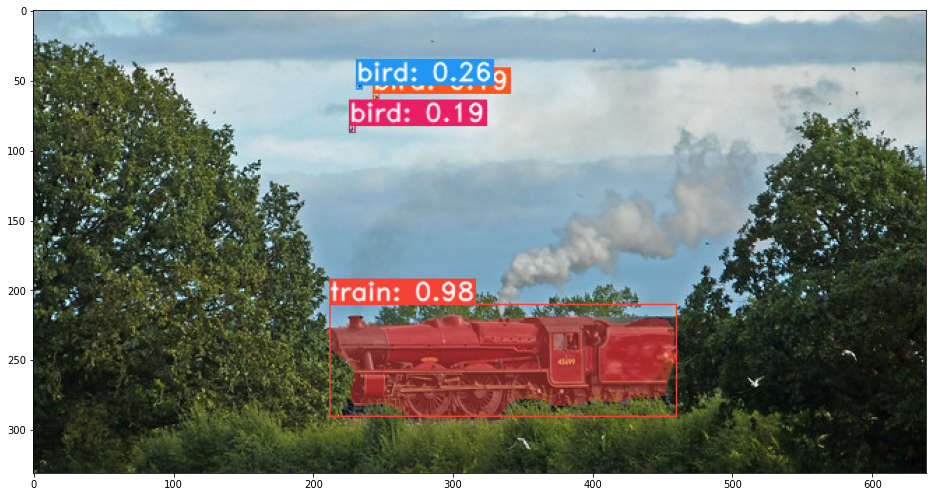

output_images/4981945644_3f162314ed_z.png


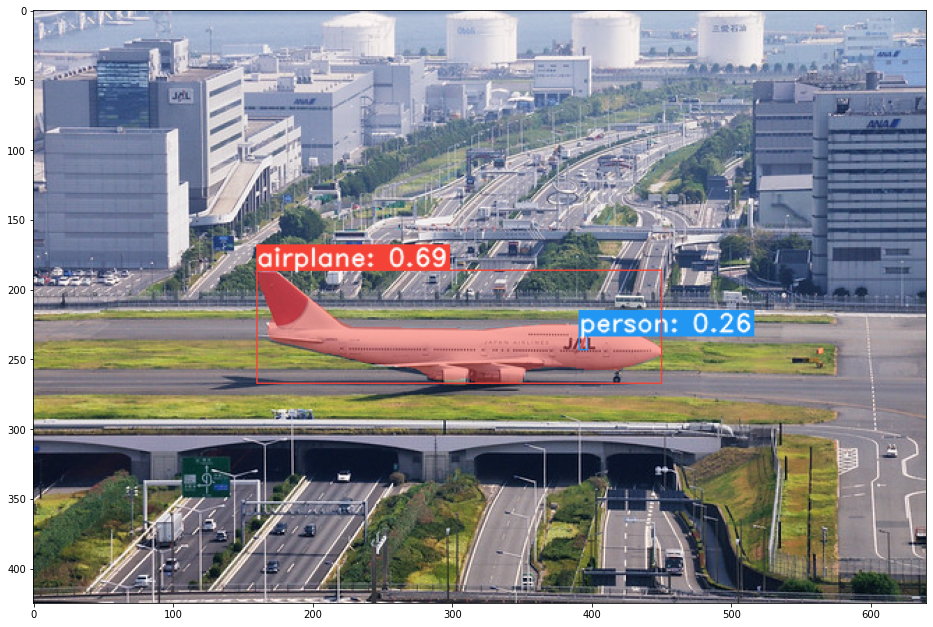

output_images/7705349298_6bea29cf1c_z.png


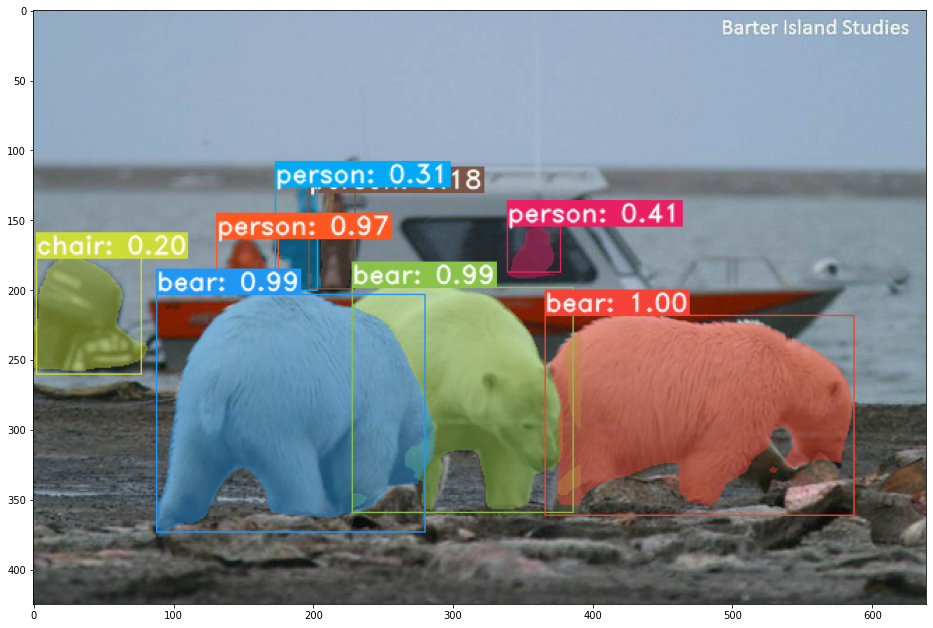

output_images/3679968895_37a79e55b3_z.png


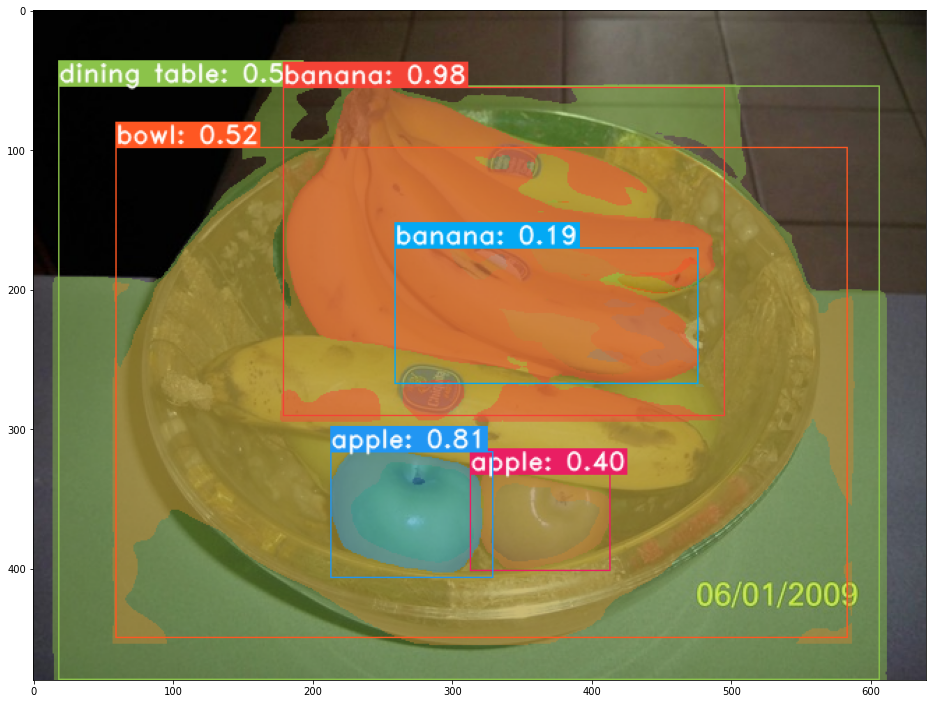

output_images/3897535041_fa8dd5570b_z.png


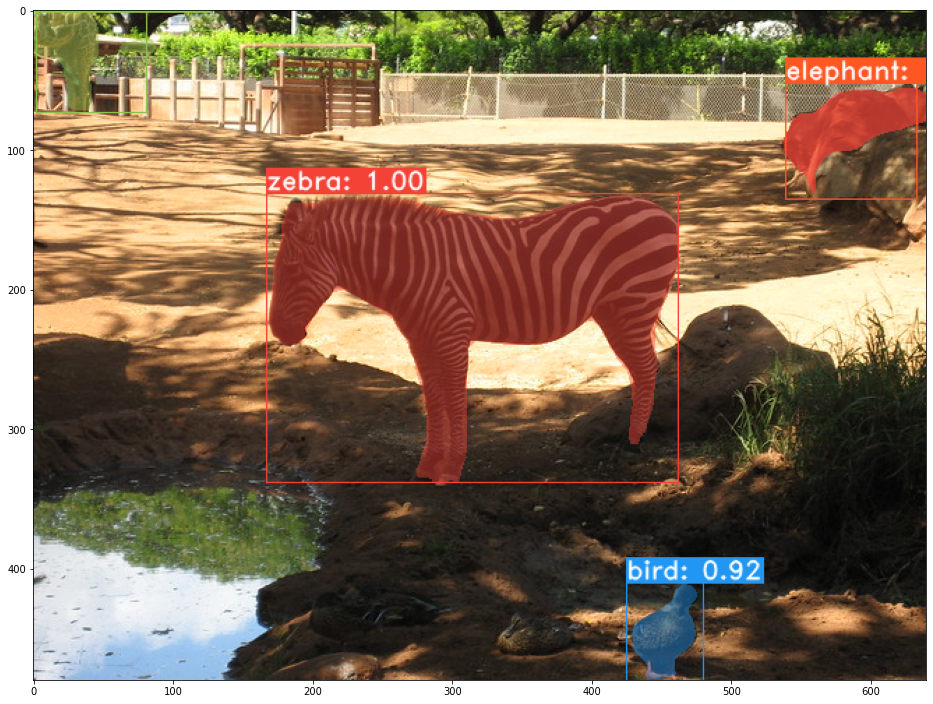

output_images/9520716824_51220b13d0_z.png


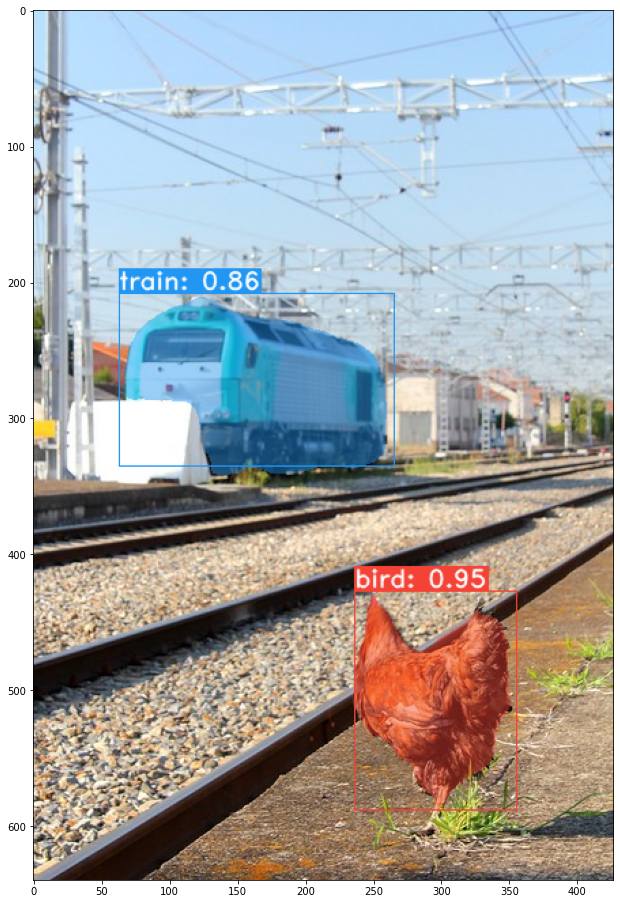

output_images/101757885_a8fc40e273_z.png


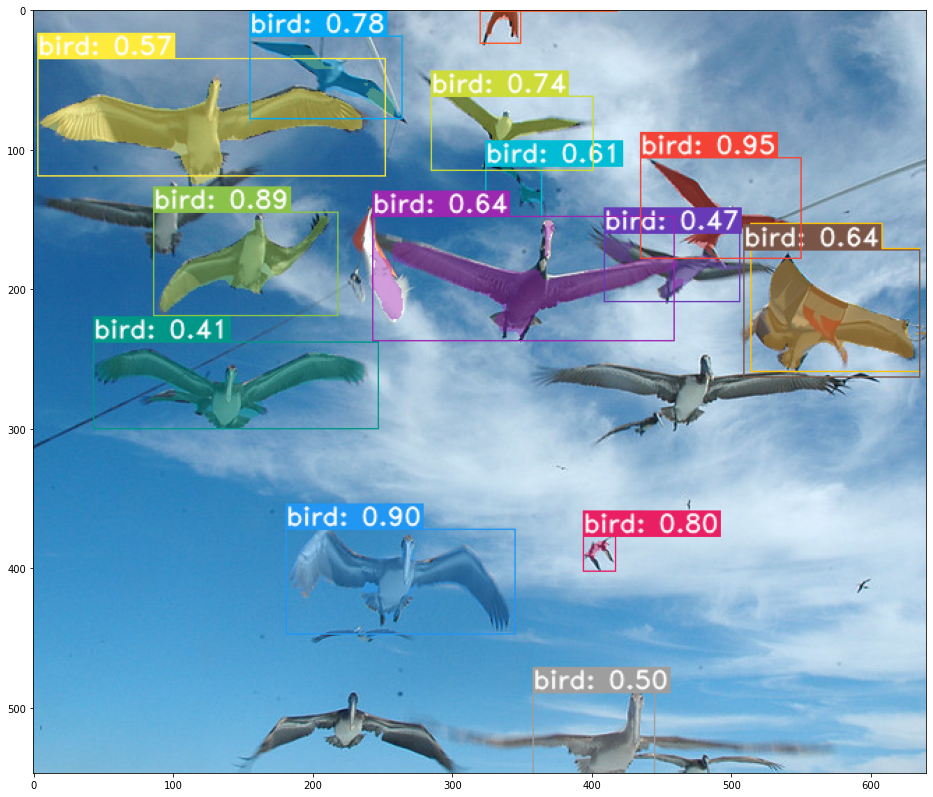

output_images/6946559805_7edf757660_z.png


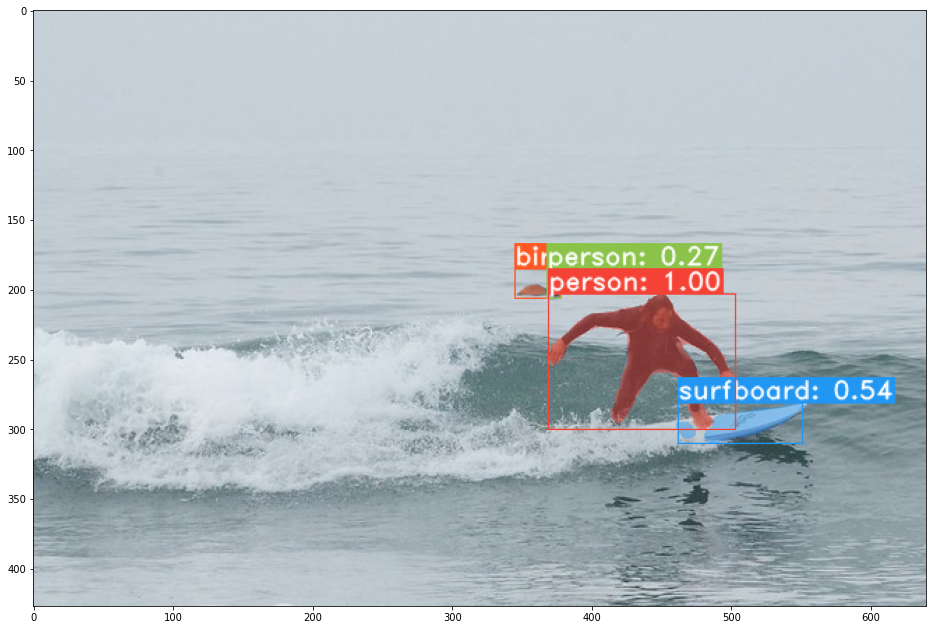

In [26]:
output_images = Path('output_images')


def show_image(img_path):
    img = cv2.imread(img_path)
    img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(16, 16))
    plt.imshow(img_cvt)
    plt.show()


for img_path in output_images.iterdir():
    print(img_path)
    show_image(str(img_path))

In [27]:
from IPython.display import HTML

In [28]:
HTML('<iframe width="1280" height="720" src="https://www.youtube.com/embed/bQgtmbzN7jg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [29]:
!mkdir -p /content/test_video

%cd /content

file_id = "1I4fivRLniVNt_LcWqhQNehTSdEkZ4ytW"
file_path = "/content/test_video/giraffes_full_720.mp4"

!python /content/download_google_drive/download_gdrive.py {file_id} {file_path}

!ls /content/test_video

/content
27.9MB [00:00, 153MB/s]
giraffes_full_720.mp4


In [31]:
%cd /content
!mkdir -p /content/output_videos
output_path = "/content/output_videos/giraffes_full_720_output.mp4"
!python ./yolact/eval.py --trained_model=./yolact/weights/yolact_resnet50_54_800000.pth --score_threshold=0.15 --top_k=15 --video_multiframe=4 --video={file_path}:{output_path}

/content
Config not specified. Parsed yolact_resnet50_config from the file name.

/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'downsample_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'lat_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'pred_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
Loading model... Done.
Initializing model... Done.

Processing FPS: 0.00 | Video Playback FPS: 8.72 | Frames in 

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
!mkdir -p /content/drive/My\ Drive/YOLACT_output
%cd /content/drive/My\ Drive/YOLACT_output
!ls

/content/drive/My Drive/YOLACT_output


In [35]:
!cp {output_path} /content/drive/My\ Drive/YOLACT_output/giraffes_full_720_output.mp4